In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
health = pd.read_csv('/content/blood.csv')
health.head(3)


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1


In [9]:
info = health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
describe = health.describe().T

# Performing Exploratery Data Analysis(EDA) :-

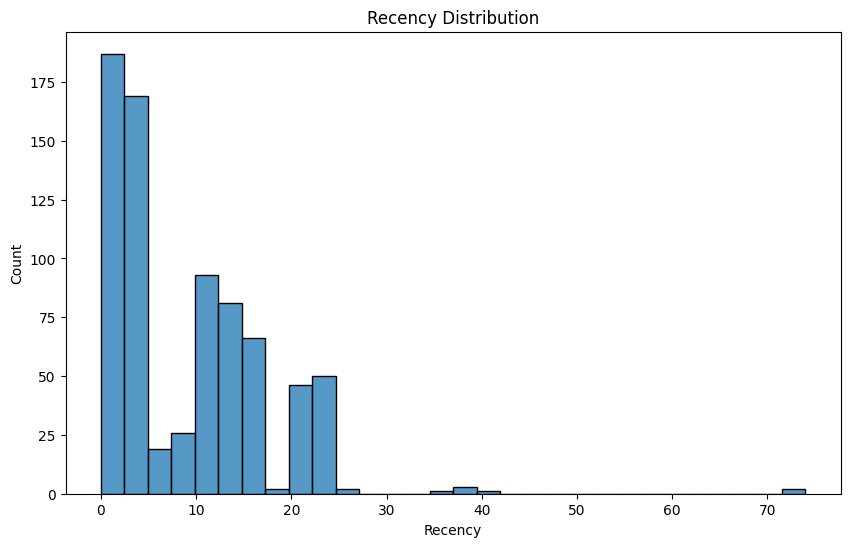

In [12]:
# Applying Histplot to Recency column :-

plt.figure(figsize=(10,6))
sns.histplot(x = 'Recency', data = health)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.show()

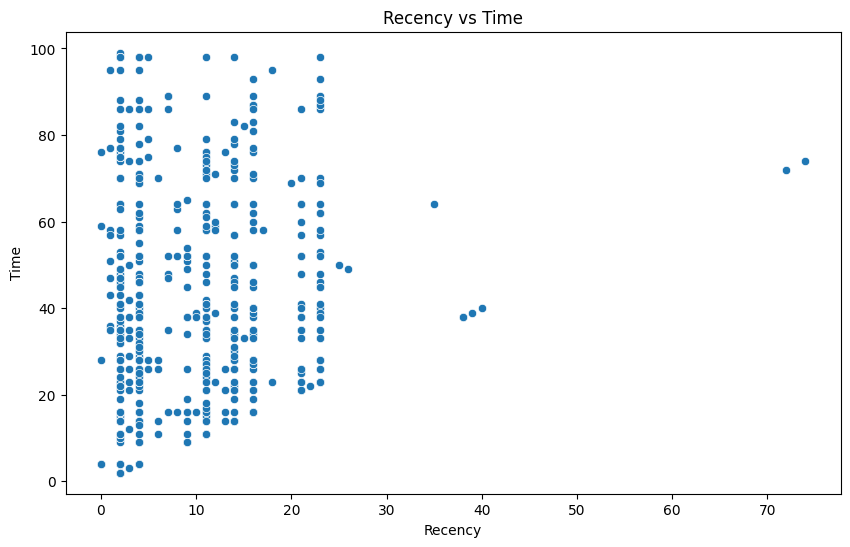

In [18]:
# Applying Scatterplot to Recency & Frequency column :-

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency', y = 'Time', data = health)
plt.title('Recency vs Time')
plt.xlabel('Recency')
plt.ylabel('Time')
plt.show()

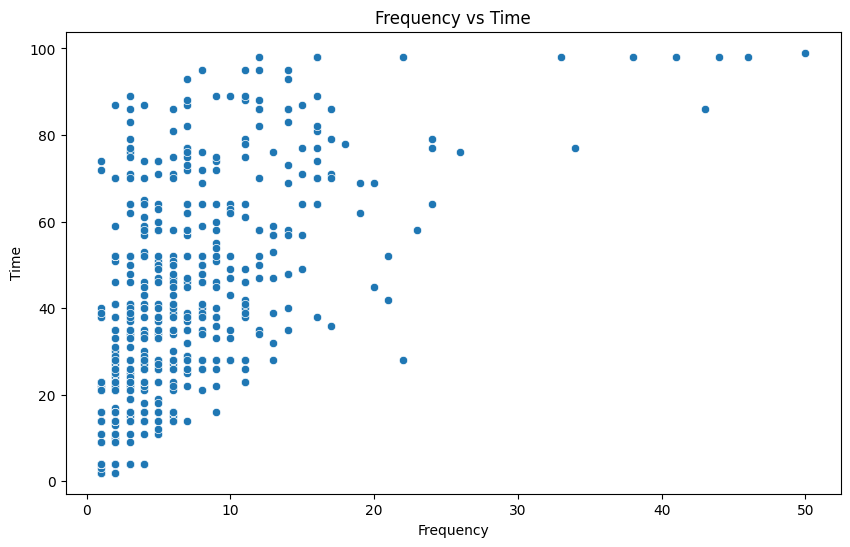

In [17]:
# # Applying Scatterplot to Recency & Frequency column :-

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Frequency', y = 'Time', data = health)
plt.title('Frequency vs Time')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.show()

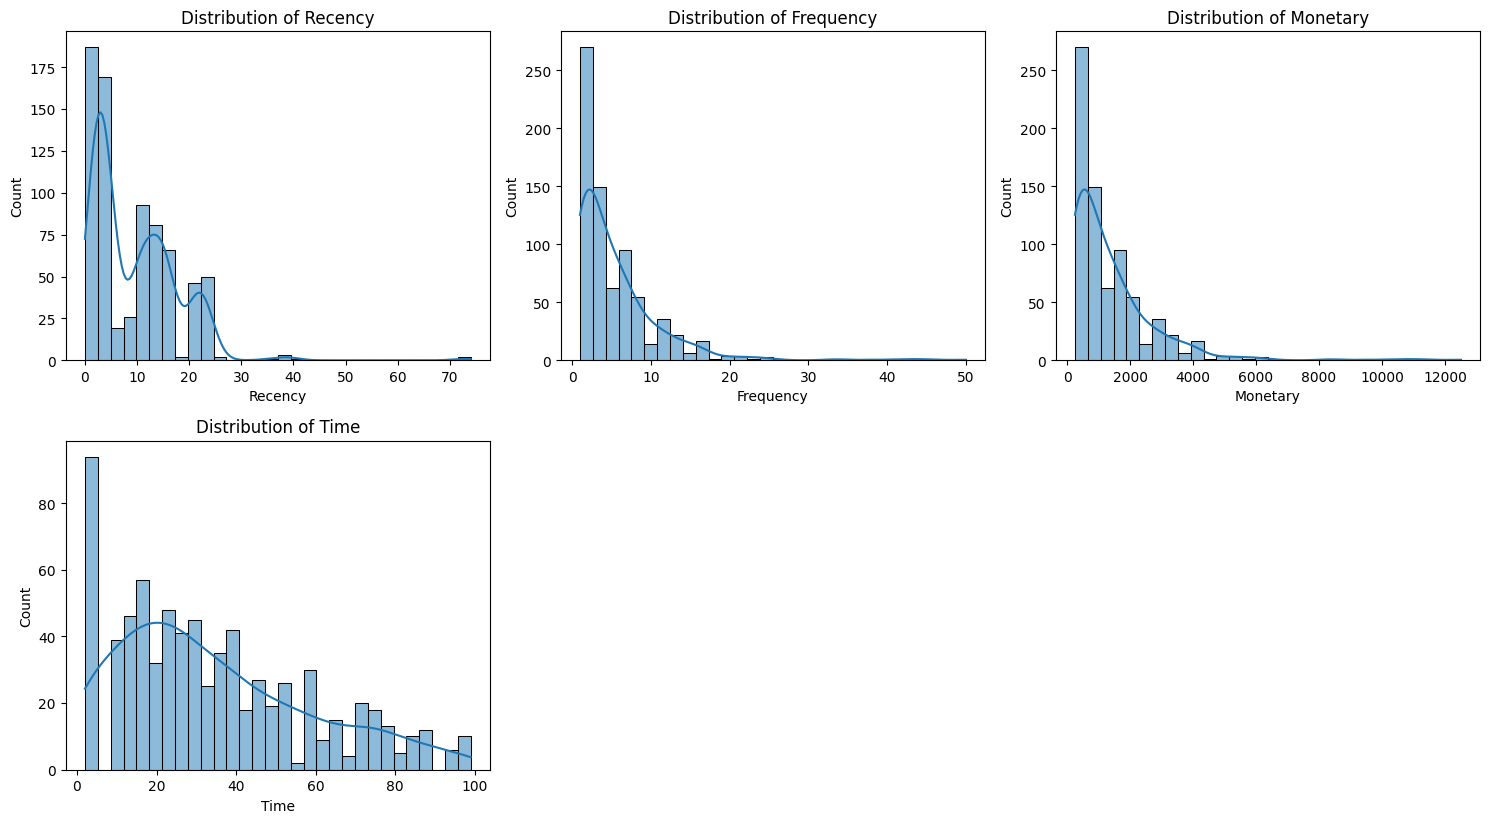

In [19]:
# Plot distribution for all numeric features
plt.figure(figsize=(15, 12))
for i, column in enumerate(health.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(health[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

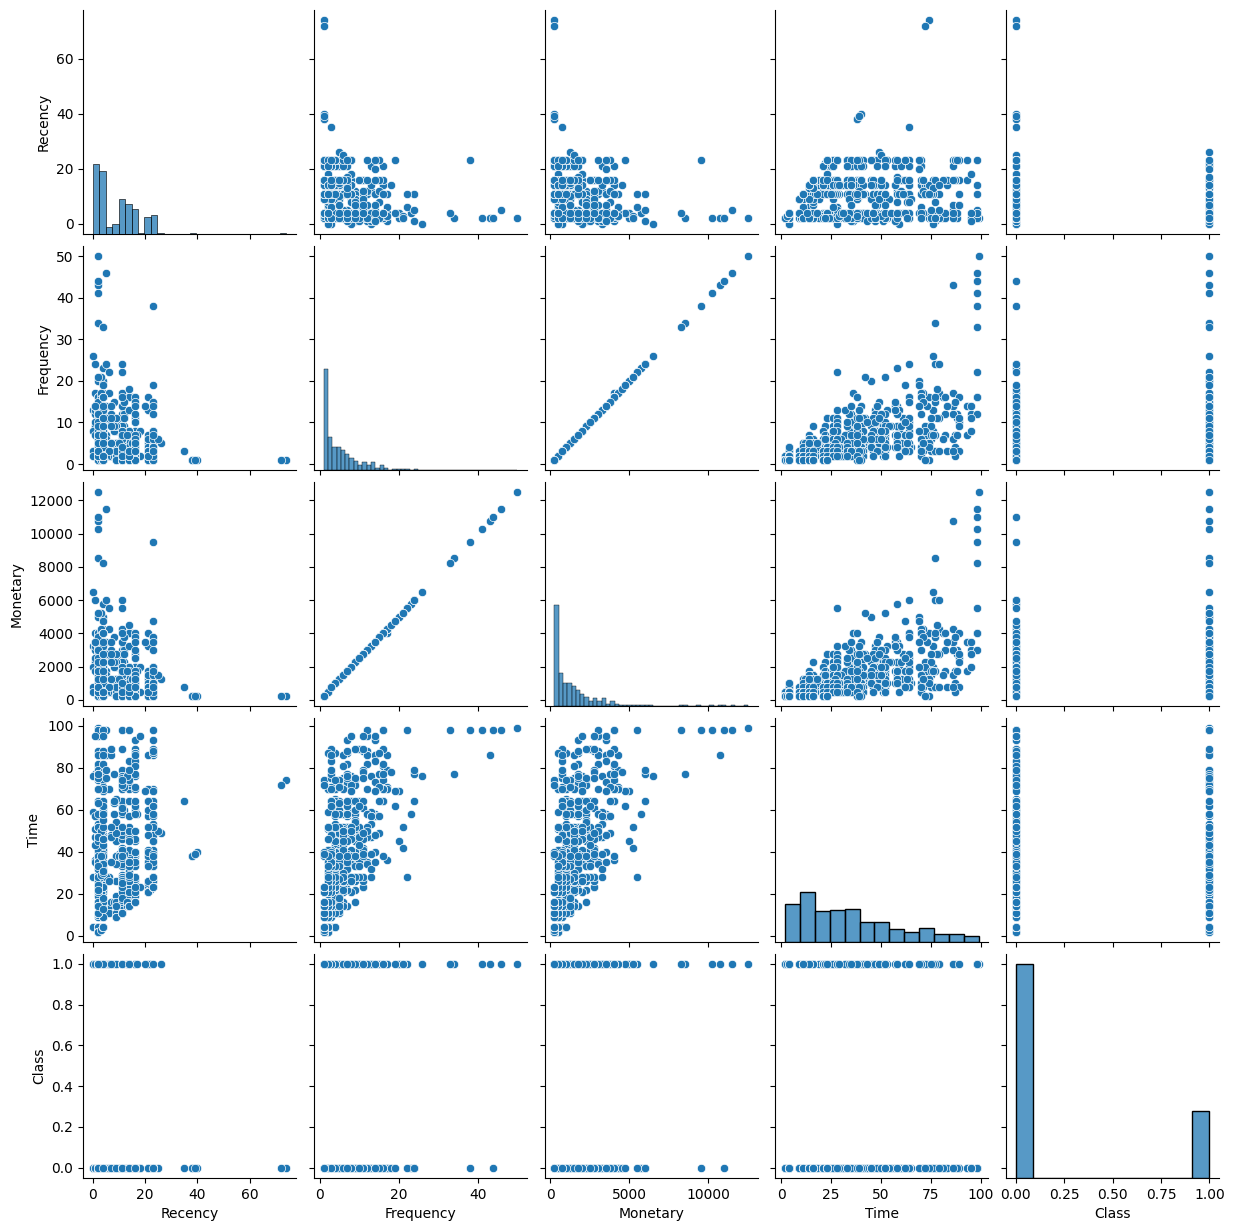

In [20]:
# Using pairplot to visualize relationships between all features and target variable
sns.pairplot(health)
plt.show()

# Finding the Co-Relation :-

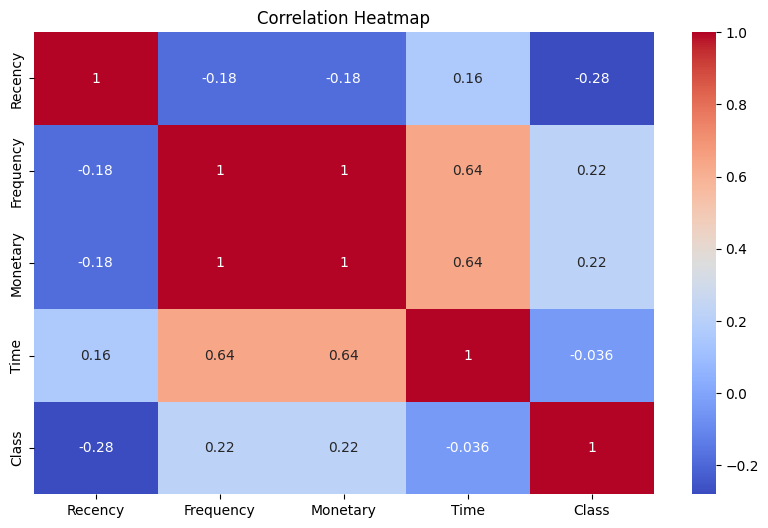

In [13]:
plt.figure(figsize = (10,6))
sns.heatmap(health.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()


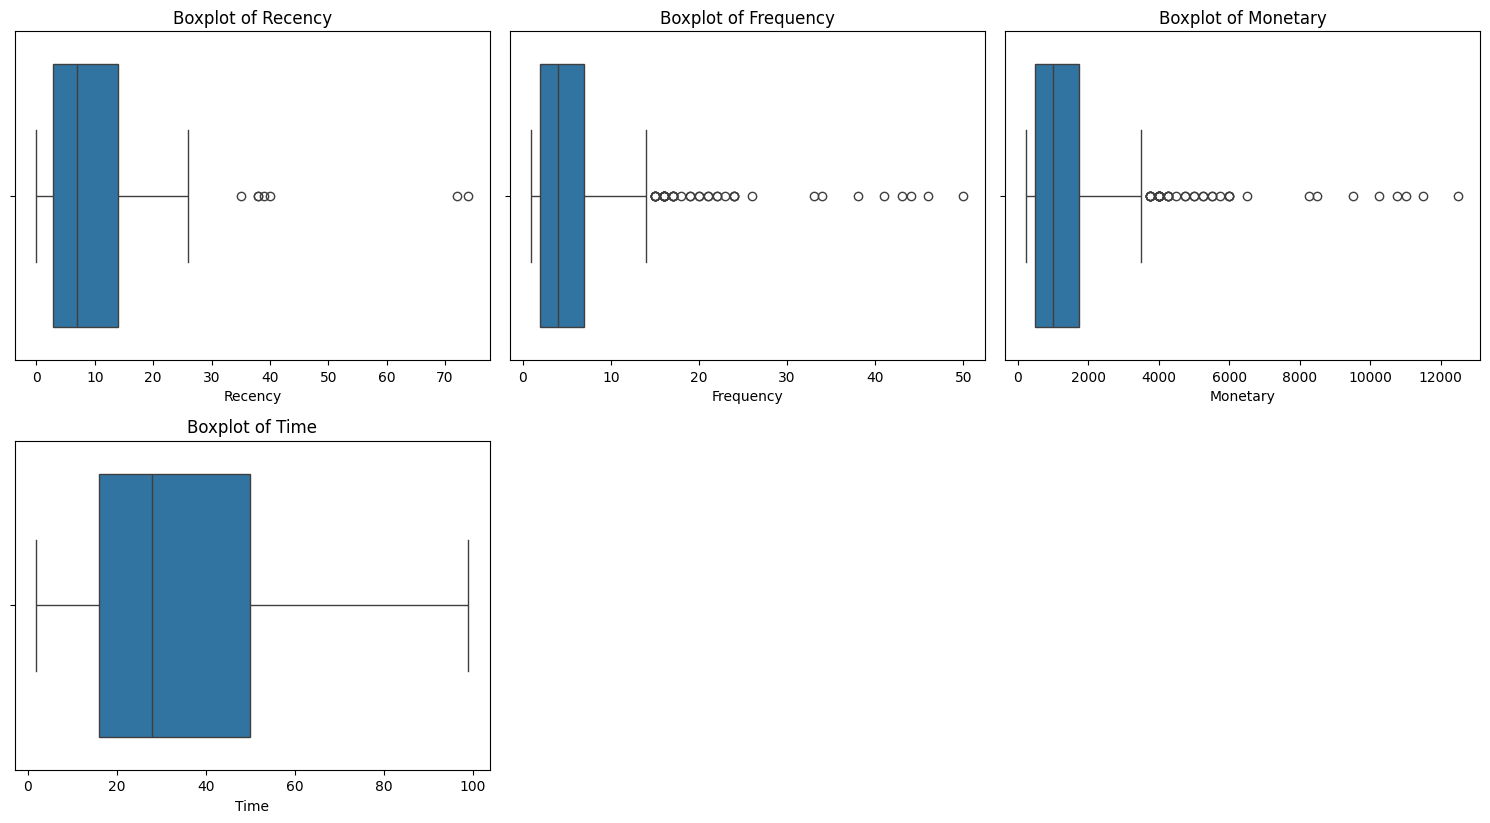

In [21]:
# Applying the Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(health.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=health, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Performing Feature Engenerring :-

In [22]:
# Finding the Outliers Using IQR method :-

for column in health.columns:
  Q1 = health[column].quantile(0.25)
  Q3 = health[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = health[(health[column] < lower_bound) | (health[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Recency: 7 outliers
Frequency: 45 outliers
Monetary: 45 outliers
Time: 0 outliers
Class: 178 outliers


In [23]:
# Replacing the Outliers with Mean :-

def replace_outliers_with_mean(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean = health[column].mean()
        health[column] = health[column].apply(lambda x : mean if (x < lower_bound or x > upper_bound) else x)
    return df


health = replace_outliers_with_mean(health)

In [26]:
# By using Mean we have replace 70% Outliers into Mean :-

for column in health.columns:
  Q1 = health[column].quantile(0.25)
  Q3 = health[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = health[(health[column] < lower_bound) | (health[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Recency: 0 outliers
Frequency: 22 outliers
Monetary: 22 outliers
Time: 0 outliers
Class: 178 outliers


In [28]:
# Replacing the other 30% outliers by using Median :-

def replace_outliers_with_median(df):
    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = health[column].median()
        health[column] = health[column].apply(lambda x : median if (x < lower_bound or x > upper_bound) else x)
    return df


health = replace_outliers_with_median(health)

In [30]:
for column in health.columns:
  Q1 = health[column].quantile(0.25)
  Q3 = health[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = health[(health[column] < lower_bound) | (health[column] > upper_bound)]
  print(f"{column}: {outliers.shape[0]} outliers")

Recency: 0 outliers
Frequency: 0 outliers
Monetary: 0 outliers
Time: 0 outliers
Class: 178 outliers


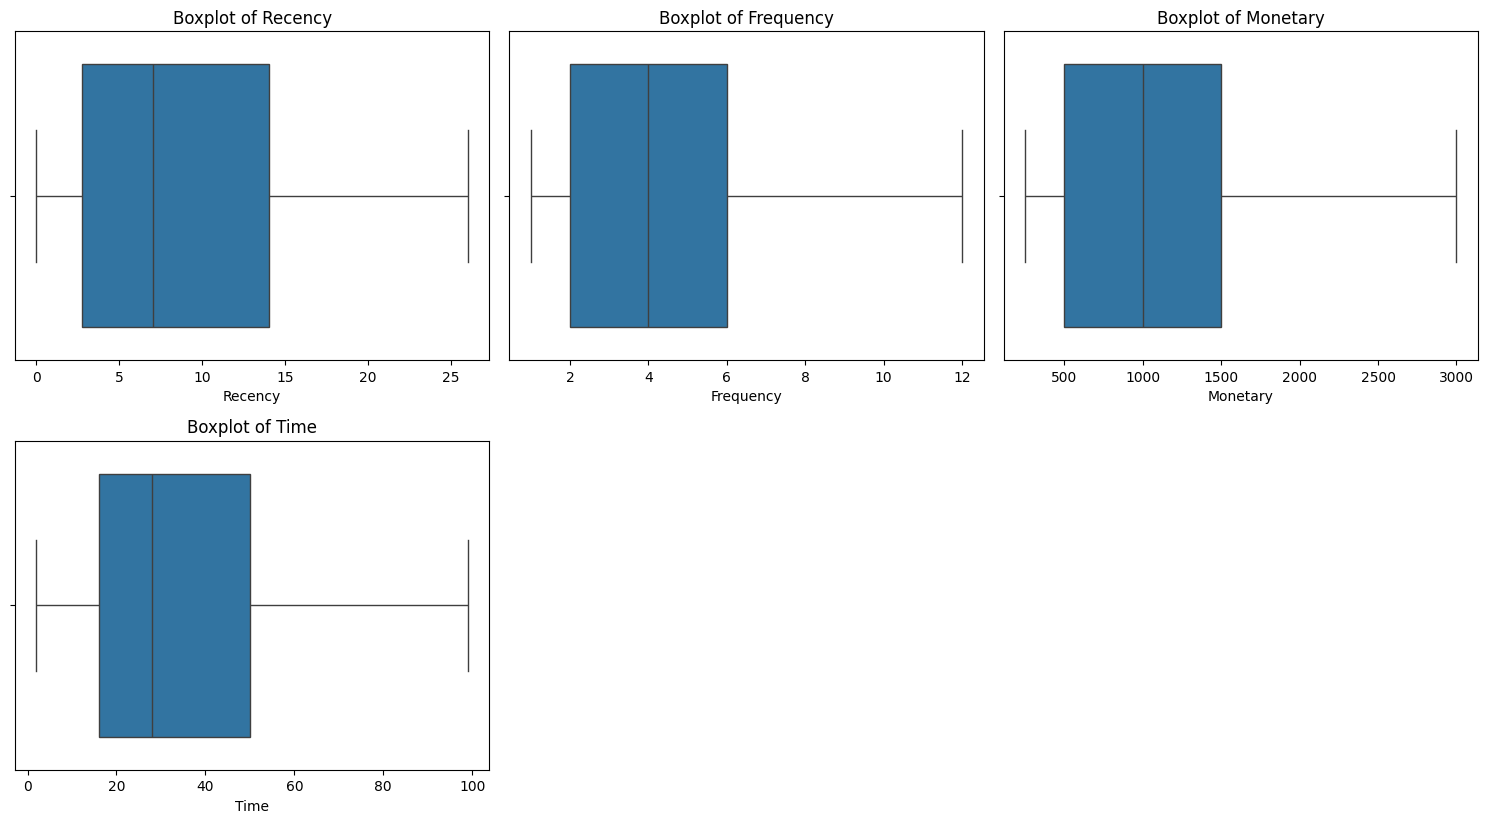

In [32]:
### Confirming by implementing Box-Plot to detect the outliers in the dataset

plt.figure(figsize=(15, 12))
for i, column in enumerate(health.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=health, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [35]:
# Adding Independent & Dependent Variables :-

X = health.drop(columns = ['Class'])
Y = health['Class']

In [40]:
# Applying StandardScalar to scale the Dataset :-

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
health_scaled = scaler.fit_transform(X)

In [42]:
# Splitting the X & Y into train test split :-

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Importing the Models :-

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [56]:
best_model = None
best_r2_score = -float('inf')
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    r2_score = model.score(X_test, Y_test)
    print(f"{name}: R2 Score = {r2_score}")
    if r2_score > best_r2_score:
        best_r2_score = r2_score
        best_model = model

print(f"Best Model: {best_model}")

Logistic Regression: R2 Score = 0.74
Decision Tree: R2 Score = -0.19757220569347034
Random Forest: R2 Score = 0.04763654978399712
Support Vector Machine: R2 Score = -0.10691152404461324
K-Nearest Neighbors: R2 Score = 0.052631578947368585
XGBoost: R2 Score = -0.19359815120697021
Gradient Boosting: R2 Score = 0.04252982820244777
Best Model: LogisticRegression()


In [57]:
# Save the model :-

import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [58]:
# Loaded the save model :-

with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [60]:
# make predictions on new data :-
best_model.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])